In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn import manifold, datasets
from sklearn.utils import check_random_state

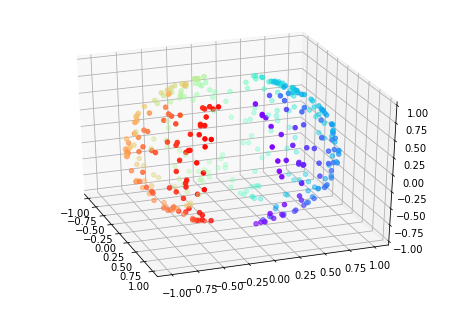

In [5]:
n_samples = 500
# check_random_state 
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# 让球体不闭合，符合流形定义
indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
colors = p[indices]
x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
    np.sin(t[indices]) * np.sin(p[indices]), \
    np.cos(t[indices])

fig = plt.figure()
ax = Axes3D(fig, elev=30, azim=-20)
ax.scatter(x, y, z, c=p[indices], marker='o', cmap=plt.cm.rainbow)

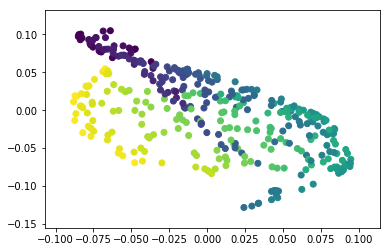

In [8]:
train_data = np.array([x, y, z]).T
trains_data = manifold.LocallyLinearEmbedding(n_neighbors =30, n_components = 2,
                                method='standard').fit_transform(train_data)
plt.scatter(trains_data[:, 0], trans_data[:, 1], marker='o', c=colors)

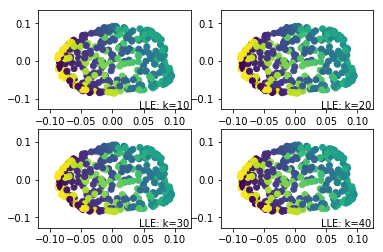

In [9]:
for index, k in enumerate((10,20,30,40)):
    plt.subplot(2,2,index+1)
    trans_data = manifold.LocallyLinearEmbedding(n_neighbors = k, n_components = 2,
                                method='standard').fit_transform(train_data)
    plt.scatter(trains_data[:, 0], trains_data[:, 1], marker='o', c=colors)
    plt.text(.99, .01, ('LLE: k=%d' % (k)),
                 transform=plt.gca().transAxes, size=10,
                 horizontalalignment='right')
plt.show()

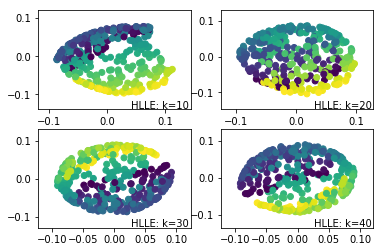

In [5]:
for index, k in enumerate((10,20,30,40)):
    plt.subplot(2,2,index+1)
    trains_data = manifold.LocallyLinearEmbedding(n_neighbors = k, n_components = 2,
                                method='hessian').fit_transform(train_data)
    plt.scatter(trans_data[:, 0], trans_data[:, 1], marker='o', c=colors)
    plt.text(.99, .01, ('HLLE: k=%d' % (k)),
                 transform=plt.gca().transAxes, size=10,
                 horizontalalignment='right')
plt.show()